In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
from sklearn.manifold import TSNE

import pythd

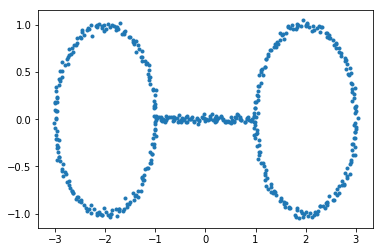

In [2]:
reload(pythd.datagen)
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-2.0, 0.0], radius=1.0, num_points=200, noise=0.025)
                .line(start=[-1.0, 0.0], end=[1.0, 0.0], num_points=100, noise=0.025)
                .circle(center=[2.0, 0.0], radius=1.0, num_points=200, noise=0.025)).get()
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [18]:
reload(pythd.filter)
filt = pythd.filter.ScikitLearnFilter(TSNE, n_components=2)
f_x = filt(dataset)

In [69]:
# Run MAPPER
reload(pythd.mapper)
cover = pythd.cover.IntervalCover.EvenlySpacedFromValues(f_x, 6, 0.4)
clustering = pythd.clustering.HierarchicalClustering()
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset, f_x=f_x)

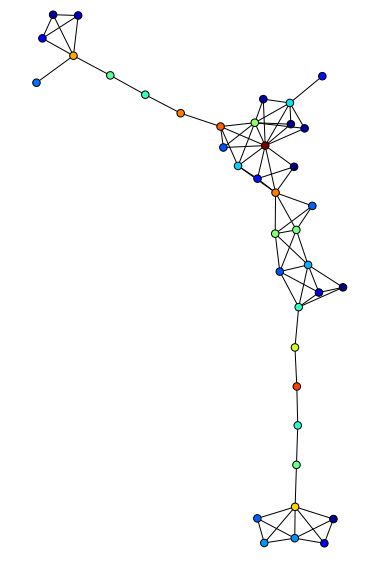

In [70]:
# Layout and plot
reload(pythd.plotting)
g = res.get_igraph_network()
layout = g.layout_kamada_kawai()
pythd.plotting.draw_topological_network(res.compute_k_skeleton(k=1), layout)